In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dateutil
from sklearn import ensemble,metrics,linear_model,tree
from tqdm import tqdm

# Read All data

In [2]:
campData=pd.read_csv('campaign_data.csv')
coupon_item_mappingData=pd.read_csv('coupon_item_mapping.csv')
customer_demographicsData=pd.read_csv('customer_demographics.csv')
c_trans_Data=pd.read_csv('customer_transaction_data.csv')
item_dataData=pd.read_csv('item_data.csv')
trainData=pd.read_csv('train.csv')
test_QyjYwdjData=pd.read_csv('test_QyjYwdj.csv')

In [102]:
trainData['dtType']='train'
test_QyjYwdjData['dtType']='test'

allData=trainData.append(test_QyjYwdjData,sort=False)
allData.shape

(128595, 6)

In [3]:
campData.head(2)

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13


In [4]:
coupon_item_mappingData.head(2)

,coupon_id,item_id
0,105,37
1,107,75


In [5]:
customer_demographicsData[customer_demographicsData['customer_id']==1574]

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
754,1574,36-45,Married,0,2,NaN,5


In [6]:
c_trans_Data['coupon_availed']=c_trans_Data['coupon_discount'].apply(lambda x: 1 if x !=0 else 0)

In [7]:
c_trans_Data[c_trans_Data['customer_id']==1574]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,coupon_availed
48887,2012-03-10,1574,5984,1,266.79,-53.43,0.00,0
48888,2012-03-10,1574,7979,1,106.50,-42.74,0.00,0
48889,2012-03-10,1574,19650,1,45.95,0.00,0.00,0
48890,2012-03-10,1574,23502,1,106.50,0.00,0.00,0
48891,2012-03-10,1574,29276,1,70.88,0.00,0.00,0
48892,2012-03-10,1574,30926,1,71.24,-10.33,0.00,0
52864,2012-03-13,1574,5176,1,248.98,0.00,0.00,0
62611,2012-03-19,1574,7496,1,142.48,-42.39,0.00,0
62612,2012-03-19,1574,12719,1,99.38,-42.74,0.00,0
62613,2012-03-19,1574,13173,1,142.48,-42.39,0.00,0


In [8]:
item_dataData.head(2)

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous


In [9]:
trainData.head(2)

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0


In [10]:
np.unique(trainData['campaign_id'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 26, 27, 28, 29,
       30], dtype=int64)

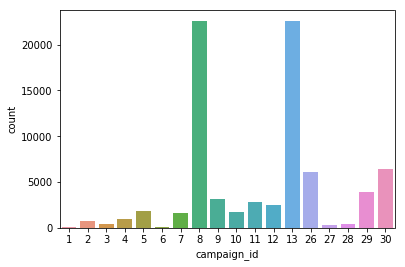

In [11]:
sns.countplot(trainData['campaign_id'])

In [12]:
trainData.groupby('customer_id').agg({'customer_id':'count','redemption_status':'sum'}).sort_values(by='redemption_status',ascending=False)

,customer_id,redemption_status
customer_id,,
1574,126,17
1070,72,15
1549,136,14
235,113,14
1136,59,11
626,80,10
594,28,10
15,104,10
1457,150,10


In [13]:
trainData.groupby('campaign_id').agg({'campaign_id':'count','redemption_status':'sum'})

,campaign_id,redemption_status
campaign_id,,
1,143,1
2,768,5
3,408,2
4,972,7
5,1827,7
6,65,1
7,1584,4
8,22555,199
9,3168,23


In [14]:
trainData[trainData['customer_id']==1574]

,id,campaign_id,coupon_id,customer_id,redemption_status
2297,3800,11,1012,1574,0
2389,3967,11,571,1574,0
3201,5325,8,63,1574,0
3334,5556,11,759,1574,0
3343,5575,4,935,1574,0
3366,5616,13,454,1574,1
6504,10818,8,983,1574,1
6651,11068,13,170,1574,0
7556,12523,30,803,1574,0
7574,12548,4,860,1574,0


In [18]:
c_tranCons=c_trans_Data.groupby(['customer_id','date'],as_index=False).agg({'item_id':'count','quantity':'sum','selling_price':'sum',
                                                  'other_discount':'sum','coupon_discount':'sum'})

In [19]:

c_tranCons['coupon_availed']=c_tranCons['coupon_discount'].apply(lambda x: 1 if x !=0 else 0)

In [30]:
c_tranCons['date']=c_tranCons['date'].apply(lambda x: dateutil.parser.parse(x)) #[c_tranCons['customer_id']==1]

In [56]:
c_tranCons.shape

(142445, 8)

In [40]:
pdList=[]
for cid,tDF in tqdm(c_tranCons.groupby('customer_id')):
    tDF['durationVisit']=tDF['date']-tDF['date'].shift()
    tDF['durationVisit']=tDF['durationVisit'].apply(lambda x: x.days)
    tDF['durationVisit']=tDF['durationVisit'].fillna(tDF['durationVisit'].mean())
    pdList.append(tDF)

  0%|                                                                                         | 0/1582 [00:00<?, ?it/s]C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\swsh\A

In [38]:
c_tranCons2=pd.concat(pdList)

In [42]:
c_tranCons2['durationVisit']=c_tranCons2['durationVisit'].fillna(c_tranCons2['durationVisit'].mean())

In [43]:
c_tranCons2.head()

,customer_id,date,item_id,quantity,selling_price,other_discount,coupon_discount,coupon_availed,durationVisit
0,1,2012-02-21,27,31,2603.45,-537.84,-35.62,1,5.317067
1,1,2012-03-08,10,13,1431.20,-305.98,0.00,0,16.000000
2,1,2012-03-29,8,9,691.73,-179.88,0.00,0,21.000000
3,1,2012-04-04,19,28,1913.50,-331.27,-17.81,1,6.000000
4,1,2012-04-11,14,17,1702.28,-546.41,0.00,0,7.000000


In [55]:
c_tranCons2.shape

(142445, 9)

In [44]:
campData['start_date']=campData['start_date'].apply(lambda x: dateutil.parser.parse(x,dayfirst=True))
campData['end_date']=campData['end_date'].apply(lambda x: dateutil.parser.parse(x,dayfirst=True))
campData['duration']=campData['end_date']-campData['start_date']
campData['duration']=campData['duration'].apply(lambda x: x.days)
campData['start_Month']=campData['start_date'].apply(lambda x: x.month)
campData['end_Month']=campData['end_date'].apply(lambda x: x.month)

In [47]:
c_tranCons3=c_tranCons2.copy()

In [48]:
# c_tranCons3['date']=c_tranCons3['date'].apply(lambda x: dateutil.parser.parse(x,dayfirst=True))

In [49]:
for j,k,l in tqdm(zip(campData['start_date'],campData['end_date'],campData['campaign_id'])):
    c_tranCons3['campaign_'+str(l).zfill(2)]=c_tranCons3['date'].apply(lambda x:1 if ((x >= j) & (x <= k)) else 0)
#     if (c_trans_Data['date'][1324561] >= j) & (c_trans_Data['date'][1324561] <= k):
#         print (j,k)

28it [00:12,  1.95it/s]


In [58]:
campCol=['campaign_24', 'campaign_25',
       'campaign_20', 'campaign_23', 'campaign_21', 'campaign_22',
       'campaign_18', 'campaign_19', 'campaign_17', 'campaign_16',
       'campaign_13', 'campaign_11', 'campaign_12', 'campaign_10',
       'campaign_09', 'campaign_08', 'campaign_07', 'campaign_06',
       'campaign_03', 'campaign_05', 'campaign_04', 'campaign_01',
       'campaign_02', 'campaign_30', 'campaign_29', 'campaign_28',
       'campaign_27', 'campaign_26']

campTran=c_tranCons3[campCol]
# campTran.iloc[1324544][campTran.iloc[1324544]==1].index

campTran['campParticipated']=campTran.apply(lambda x: x[x==1].index.values, axis = 1)

C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [59]:
campTran.shape

(142445, 29)

In [65]:
c_tranCons3['campParticipated']=campTran['campParticipated']
c_tranCons3['filt']=c_tranCons3['campParticipated'].apply(lambda x: len(x))

In [68]:
for j in campCol:
    del c_tranCons3[j]

In [70]:
c_tranCons3=c_tranCons3[c_tranCons3['filt'] !=0]

In [74]:
c_tranCons3['campParticipated']=c_tranCons3['campParticipated'].apply(lambda x: [x_.split('_')[1] for x_ in x])

In [78]:
# someWierdData=pd.merge(c_tranCons3,coupon_item_mappingData,on='item_id',how='left')

In [77]:
# np.unique(test_QyjYwdjData['campaign_id'])

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [81]:
# someWierdData=someWierdData[['date','customer_id', 'coupon_id',  'item_id', 'quantity', 'selling_price',
#        'other_discount', 'coupon_discount', 'coupon_availed', 'durationVisit',
#        'campParticipated', 'filt']]

In [86]:
# someWierdData=someWierdData[~someWierdData['coupon_id'].isnull()]

In [97]:
c_tranCons3.head()

,customer_id,date,item_id,quantity,selling_price,other_discount,coupon_discount,coupon_availed,durationVisit,campParticipated,filt
18,1,2012-08-12,44,56,3929.23,-773.99,-135.36,1,5.0,[26],1
19,1,2012-08-23,12,12,932.88,-178.09,0.00,0,11.0,[26],1
20,1,2012-09-03,29,35,2700.68,-584.87,0.00,0,11.0,"[27, 26]",2
21,1,2012-09-20,25,27,2320.63,-481.93,-97.95,1,17.0,"[28, 27, 26]",3
22,1,2012-10-01,41,54,3259.94,-740.89,-121.10,1,11.0,"[28, 27]",2


In [100]:
def getFeatureGener(df,indCol,fCol):
    groupedMerge=df.groupby(indCol)
    c_data={}
    for c_id,tempT in  groupedMerge:
        c_data[c_id]={}
        c_data[c_id][indCol+fCol+'_max']=max(tempT[fCol])
        c_data[c_id][indCol+fCol+'_min']=min(tempT[fCol])
        c_data[c_id][indCol+fCol+'_mean']=np.mean(tempT[fCol])
        c_data[c_id][indCol+fCol+'_75perc']=np.percentile(tempT[fCol],75)
        c_data[c_id][indCol+fCol+'_25perc']=np.percentile(tempT[fCol],25)
    tempDF=pd.DataFrame(c_data).transpose()
    tempDF.columns=[indCol+fCol+'_max',indCol+fCol+'_min',indCol+fCol+'_mean',indCol+fCol+'_75perc',indCol+fCol+'_25perc']
    return tempDF,tempDF.index

In [101]:
quantityCData,indexC=getFeatureGener(c_tranCons3,'customer_id','quantity')
selling_priceCData,indexC=getFeatureGener(c_tranCons3,'customer_id','selling_price')
other_discountCData,indexC=getFeatureGener(c_tranCons3,'customer_id','other_discount')
coupon_discountCData,indexC=getFeatureGener(c_tranCons3,'customer_id','coupon_discount')
occurenceofPurchCData,indexC=getFeatureGener(c_tranCons3,'customer_id','durationVisit')

featureCustomerData=pd.concat([quantityCData,selling_priceCData,other_discountCData,coupon_discountCData,occurenceofPurchCData],axis=1)

featureCustomerData=featureCustomerData.reset_index()
featureCustomerData.columns=['customer_id']+list(featureCustomerData.columns[1:])

featureCustomerData.head()

,customer_id,customer_idquantity_max,customer_idquantity_min,customer_idquantity_mean,customer_idquantity_75perc,customer_idquantity_25perc,customer_idselling_price_max,customer_idselling_price_min,customer_idselling_price_mean,customer_idselling_price_75perc,...,customer_idcoupon_discount_max,customer_idcoupon_discount_min,customer_idcoupon_discount_mean,customer_idcoupon_discount_75perc,customer_idcoupon_discount_25perc,customer_iddurationVisit_max,customer_iddurationVisit_min,customer_iddurationVisit_mean,customer_iddurationVisit_75perc,customer_iddurationVisit_25perc
0,1,7.00,34.75,56.0,22.236842,1.0,672.2275,2749.0400,3932.07,1774.978684,...,-99.2925,0.0,0.0,-48.067105,-204.82,5.25,11.0,25.0,8.605263,1.0
1,2,7.00,30.00,47.0,16.941176,1.0,640.8000,2146.4600,4228.81,1591.120588,...,0.0000,0.0,0.0,-4.190588,-35.62,8.00,27.0,70.0,18.823529,2.0
2,3,4.75,47.00,6949.0,321.125000,2.0,433.7500,2292.0425,8357.15,1896.309167,...,0.0000,0.0,0.0,-61.413750,-1077.13,6.00,16.0,40.0,12.875000,1.0
3,4,3.00,9.50,12.0,6.631579,1.0,390.9250,999.1400,2594.91,895.446842,...,0.0000,0.0,0.0,0.000000,0.00,4.00,19.5,46.0,14.736842,1.0
4,5,3.00,10.00,14638.0,756.373984,1.0,255.5700,897.4400,1865.76,614.948293,...,0.0000,0.0,0.0,-0.738455,-71.24,1.00,4.0,7.0,2.617886,1.0


In [103]:
itenACoupData=pd.merge(coupon_item_mappingData,item_dataData,on='item_id',how='left').sort_values('coupon_id')
itemInfoFromTransaction=c_trans_Data.groupby('item_id',as_index=False).agg({'selling_price':'mean',
                                                                     'coupon_discount':{'discountCount':'count','totalDisc':'sum'},
                                                                    'other_discount':{'OTdiscountCount':'count','OTtotalDisc':'sum'}})

C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [104]:
itemInfoFromTransaction.columns=[''.join(j) for j in itemInfoFromTransaction.columns]

itenACoupData=pd.merge(coupon_item_mappingData,item_dataData,on='item_id',how='left').sort_values('coupon_id')

itemInfoFromTransaction['dicountPerGiven']=abs(itemInfoFromTransaction['coupon_discounttotalDisc']/itemInfoFromTransaction['coupon_discountdiscountCount'])
itemInfoFromTransaction['dicountOthPerGiven']=abs(itemInfoFromTransaction['other_discountOTtotalDisc']/itemInfoFromTransaction['other_discountOTdiscountCount'])
itemInfoFromTransaction['dicountGivenPerc']=abs(itemInfoFromTransaction['dicountPerGiven']/itemInfoFromTransaction['selling_pricemean'])
itemInfoFromTransaction['dicountOthPerGivenPerc']=abs(itemInfoFromTransaction['dicountOthPerGiven']/itemInfoFromTransaction['selling_pricemean'])

In [105]:
transItemData=pd.merge(c_trans_Data,item_dataData,on='item_id',how='left')
transItemData.shape

transItemData['coupon_discountAvail']=transItemData['coupon_discount'].apply(lambda x: 1 if x !=0 else 0)

itemCouponDetail=transItemData.groupby('item_id',as_index=False).agg({'coupon_discountAvail':{'sumOFCoupon':'sum','totalCount':'count'}})
itemCouponDetail.columns=[''.join(jj) for jj in itemCouponDetail.columns]
itemCouponDetail['probaItem']=itemCouponDetail['coupon_discountAvailsumOFCoupon']/itemCouponDetail['coupon_discountAvailtotalCount']
# itemCouponDetail[itemCouponDetail['probaItem']>0]

mergedItemCoupon=pd.merge(itenACoupData,itemInfoFromTransaction,on='item_id',how='left').fillna(0)
mergedItemCoupon=pd.merge(mergedItemCoupon,itemCouponDetail[['item_id','probaItem']],on='item_id',how='left').fillna(0)
#some  null values present

C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [106]:
datatoCluster=mergedItemCoupon.groupby('coupon_id',as_index=False).mean()[['coupon_id', 
       'selling_pricemean', 'coupon_discountdiscountCount',
       'coupon_discounttotalDisc', 'other_discountOTdiscountCount',
       'other_discountOTtotalDisc', 'dicountPerGiven', 'dicountOthPerGiven',
       'dicountGivenPerc', 'dicountOthPerGivenPerc','probaItem']]

clusVar=['coupon_id', 
       'selling_pricemean', 'coupon_discountdiscountCount',
       'coupon_discounttotalDisc', 'other_discountOTdiscountCount',
       'other_discountOTtotalDisc', 'dicountPerGiven', 'dicountOthPerGiven',
       'dicountGivenPerc', 'dicountOthPerGivenPerc','probaItem']

from sklearn import preprocessing,cluster,decomposition

preProCl=preprocessing.StandardScaler()
clusData=preProCl.fit_transform(datatoCluster[clusVar])

pcaComp=decomposition.PCA()
pcaData=pcaComp.fit_transform(clusData)
pcaComp.explained_variance_ratio_

C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([2.79542360e-01, 2.31167876e-01, 1.53863041e-01, 9.63630190e-02,
       8.42399429e-02, 6.87384326e-02, 3.42950469e-02, 2.09483641e-02,
       1.83482362e-02, 1.24936816e-02, 6.52125467e-34])

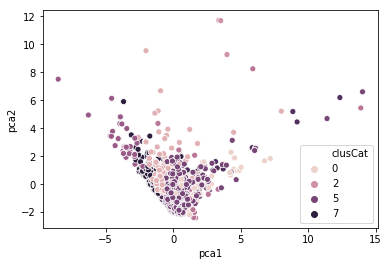

In [107]:
pcaDataFToGraph=pd.DataFrame(pcaData[:,:2],columns=['pca1','pca2'])
kM=cluster.KMeans()
pcaDataFToGraph['clusCat']=kM.fit_predict(clusData[:,:5])
pcaDataFToGraph.head(2)
sns.scatterplot(pcaDataFToGraph['pca1'],pcaDataFToGraph['pca2'],hue=pcaDataFToGraph['clusCat'])

pcaDataTOCoup=pd.concat([datatoCluster[['coupon_id']],pcaDataFToGraph],axis=1)

In [108]:
pcaDataTOCoup.head(2)

,coupon_id,pca1,pca2,clusCat
0,1,-0.340717,-0.033526,6
1,2,-1.263719,-0.070596,7


In [109]:
coupon_categFind=mergedItemCoupon.groupby(['coupon_id','category','brand','brand_type'],as_index=False).count()[['coupon_id','category','brand','brand_type','item_id']]
couponProbItemCoup=mergedItemCoupon.groupby('coupon_id',as_index=False).agg({'probaItem':'mean'})
coupon_categFind=coupon_categFind.sort_values(['coupon_id','item_id'],ascending=False)
coupon_categFind=coupon_categFind.drop_duplicates('coupon_id')
coupon_categFind=pd.merge(coupon_categFind,couponProbItemCoup,on='coupon_id',how='left')
del coupon_categFind['item_id']

In [114]:
coupon_categFind[coupon_categFind['coupon_id']==19]

,coupon_id,category,brand,brand_type,probaItem
1097,19,"Dairy, Juices & Snacks",56,Local,0.0


# Join all data1

In [117]:
X1=pd.merge(allData,featureCustomerData,on='customer_id',how='left')
# X1=pd.merge(X1,couponFeatureData,on='coupon_id',how='left')
X1=pd.merge(X1,campData,on='campaign_id',how='left')
X1=pd.merge(X1,customer_demographicsData,on='customer_id',how='left')
X1=pd.merge(X1,pcaDataTOCoup,on='coupon_id',how='left')
X1=pd.merge(X1,coupon_categFind,on='coupon_id',how='left')


In [118]:
X1.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,dtType,customer_idquantity_max,customer_idquantity_min,customer_idquantity_mean,customer_idquantity_75perc,...,family_size,no_of_children,income_bracket,pca1,pca2,clusCat,category,brand,brand_type,probaItem
0,1,13,27,1053,0.0,train,2.0,15.00,12444.0,1310.357143,...,1,NaN,5.0,-0.877972,1.839533,6,Grocery,1105,Established,0.049723
1,2,13,116,48,0.0,train,5.0,9.00,40.0,8.828571,...,2,NaN,3.0,-0.788654,-0.861355,6,Grocery,56,Local,0.000000
2,6,9,635,205,0.0,train,5.0,26.00,54.0,15.666667,...,2,NaN,7.0,1.195796,0.431837,0,Pharmaceutical,560,Established,0.077896
3,7,13,644,1050,0.0,train,1.0,3.25,42.0,5.025000,...,NaN,NaN,NaN,2.455059,-0.265897,5,Grocery,611,Established,0.250000
4,9,8,1017,1489,0.0,train,4.0,17.00,15424.0,1585.113924,...,2,NaN,3.0,-0.750206,0.493162,1,Grocery,1558,Established,0.008487


In [119]:
X5=X1

In [120]:
X5['marital_status']=X5['marital_status'].fillna('Other')
X5['rented']=X5['rented'].fillna(0)
X5['no_of_children']=X5['no_of_children'].fillna('0')
X5['age_range']=X5['age_range'].fillna('Other')
X5['family_size']=X5['family_size'].fillna('9999')
X5['income_bracket']=X5['income_bracket'].fillna(9999)

In [121]:
from sklearn import preprocessing,model_selection

In [122]:
llP=preprocessing.LabelEncoder()
# X5[jj]=llP.fit_transform(X5['campaign_type'])

In [123]:
categoColumns=['age_range', 'marital_status', 'rented', 'family_size','category', 'brand_type',
       'no_of_children', 'income_bracket','campaign_type']+['clusCat']
X5[categoColumns].head(2)#category	brand	brand_type	

,age_range,marital_status,rented,family_size,category,brand_type,no_of_children,income_bracket,campaign_type,clusCat
0,46-55,Other,0.0,1,Grocery,Established,0,5.0,X,6
1,36-45,Married,0.0,2,Grocery,Local,0,3.0,X,6


In [124]:
X5['income_bracket']=X5['income_bracket'].map(str)
X5['no_of_children']=X5['no_of_children'].map(str)
X5['clusCat']=X5['clusCat'].map(str)
X5['rented']=X5['rented'].map(str)

In [125]:
X5.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,dtType,customer_idquantity_max,customer_idquantity_min,customer_idquantity_mean,customer_idquantity_75perc,...,family_size,no_of_children,income_bracket,pca1,pca2,clusCat,category,brand,brand_type,probaItem
0,1,13,27,1053,0.0,train,2.0,15.00,12444.0,1310.357143,...,1,0,5.0,-0.877972,1.839533,6,Grocery,1105,Established,0.049723
1,2,13,116,48,0.0,train,5.0,9.00,40.0,8.828571,...,2,0,3.0,-0.788654,-0.861355,6,Grocery,56,Local,0.000000
2,6,9,635,205,0.0,train,5.0,26.00,54.0,15.666667,...,2,0,7.0,1.195796,0.431837,0,Pharmaceutical,560,Established,0.077896
3,7,13,644,1050,0.0,train,1.0,3.25,42.0,5.025000,...,9999,0,9999.0,2.455059,-0.265897,5,Grocery,611,Established,0.250000
4,9,8,1017,1489,0.0,train,4.0,17.00,15424.0,1585.113924,...,2,0,3.0,-0.750206,0.493162,1,Grocery,1558,Established,0.008487


In [126]:
pd.unique(X5['family_size'])

array(['1', '2', '9999', '3', '4', '5+'], dtype=object)

In [127]:

catData=pd.get_dummies(X5[categoColumns],prefix_sep='_',)
# for jj in categoColumns:
#     print (jj)
#     llP=preprocessing.LabelEncoder()
#     X5[jj]=llP.fit_transform(X5[jj])

In [128]:
newtData=pd.concat([X5,catData],sort=False,axis=1)
# newtData=X5

In [129]:
newtData.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'dtType', 'customer_idquantity_max', 'customer_idquantity_min',
       'customer_idquantity_mean', 'customer_idquantity_75perc',
       ...
       'campaign_type_X', 'campaign_type_Y', 'clusCat_0', 'clusCat_1',
       'clusCat_2', 'clusCat_3', 'clusCat_4', 'clusCat_5', 'clusCat_6',
       'clusCat_7'],
      dtype='object', length=108)

In [130]:
XVar=list(newtData.columns)
XVar.remove('id')
XVar.remove('redemption_status')
XVar.remove('dtType')
XVar.remove('start_date')
XVar.remove('end_date')
YVar='redemption_status'

In [131]:
for j in categoColumns:#['campaign_id', 'coupon_id', 'customer_id']:
    XVar.remove(j)

In [132]:
trainPart=newtData[newtData['dtType']=='train']
testPart=newtData[newtData['dtType']=='test']
trainPart.shape,testPart.shape

((78369, 108), (50226, 108))

In [133]:
from sklearn import model_selection,metrics
import xgboost as xgb

In [134]:
# 	if feature_names is not None:
# 		create_feature_map(feature_names)
# 		model.dump_model('xgbmodel.txt', 'xgb.fmap', with_stats=True)
# 		importance = model.get_fscore(fmap='xgb.fmap')
# 		importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
# 		imp_df = pd.DataFrame(importance, columns=['feature','fscore'])
# 		imp_df['fscore'] = imp_df['fscore'] / imp_df['fscore'].sum()
# 		imp_df.to_csv("imp_feat.txt", index=False)

# 	pred_test_y = model.predict(xgtest, ntree_limit=model.best_ntree_limit)
# 	pred_test_y2 = model.predict(xgb.DMatrix(test_X2), ntree_limit=model.best_ntree_limit)

# 	loss = 0
# 	if test_y is not None:
# 		loss = metrics.roc_auc_score(test_y, pred_test_y)
# 		return pred_test_y, loss, pred_test_y2
# 	else:
# 		return pred_test_y, loss, pred_test_y2

## Train test Split Train, Val, Test set

In [135]:
trainX,testHX,trainY,testHY=model_selection.train_test_split(trainPart[XVar],trainPart[YVar],test_size=.2,stratify =trainPart[YVar])
trainX.shape,testHX.shape,trainY.shape,testHY.shape

((62695, 93), (15674, 93), (62695,), (15674,))

In [136]:
trainX1,valX1,trainY1,valY1=model_selection.train_test_split(trainX,trainY,test_size=.2,stratify =trainY)
trainX1.shape,valX1.shape,trainY1.shape,valY1.shape

((50156, 93), (12539, 93), (50156,), (12539,))

In [137]:
list(trainX1.columns)

['campaign_id',
 'coupon_id',
 'customer_id',
 'customer_idquantity_max',
 'customer_idquantity_min',
 'customer_idquantity_mean',
 'customer_idquantity_75perc',
 'customer_idquantity_25perc',
 'customer_idselling_price_max',
 'customer_idselling_price_min',
 'customer_idselling_price_mean',
 'customer_idselling_price_75perc',
 'customer_idselling_price_25perc',
 'customer_idother_discount_max',
 'customer_idother_discount_min',
 'customer_idother_discount_mean',
 'customer_idother_discount_75perc',
 'customer_idother_discount_25perc',
 'customer_idcoupon_discount_max',
 'customer_idcoupon_discount_min',
 'customer_idcoupon_discount_mean',
 'customer_idcoupon_discount_75perc',
 'customer_idcoupon_discount_25perc',
 'customer_iddurationVisit_max',
 'customer_iddurationVisit_min',
 'customer_iddurationVisit_mean',
 'customer_iddurationVisit_75perc',
 'customer_iddurationVisit_25perc',
 'duration',
 'start_Month',
 'end_Month',
 'pca1',
 'pca2',
 'brand',
 'probaItem',
 'age_range_18-25',

In [138]:
# def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None, feature_names=None, seed_val=0, rounds=500, dep=8, eta=0.05):
params = {}
params["objective"] = "binary:logistic"
params['eval_metric'] = 'auc'
params["eta"] = .05
params["subsample"] = 0.7
params["min_child_weight"] = 1
params["colsample_bytree"] = 0.7
params["max_depth"] = 8

params["silent"] = 1
params["seed"] = 200
#params["max_delta_step"] = 2
#params["gamma"] = 0.5
num_rounds = 500

plst = list(params.items())
xgtrain = xgb.DMatrix(trainX1, label=trainY1)

# if test_y is not None:
xgtest = xgb.DMatrix(valX1, label=valY1)
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=100, verbose_eval=20)
# else:
#     xgtest = xgb.DMatrix(test_X)
#     model = xgb.train(plst, xgtrain, num_rounds)

C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.803564	test-auc:0.805481
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 100 rounds.
[20]	train-auc:0.923517	test-auc:0.914364
[40]	train-auc:0.965486	test-auc:0.936666
[60]	train-auc:0.978427	test-auc:0.946308
[80]	train-auc:0.986039	test-auc:0.951362
[100]	train-auc:0.990904	test-auc:0.953452
[120]	train-auc:0.993556	test-auc:0.954184
[140]	train-auc:0.995344	test-auc:0.954562
[160]	train-auc:0.996734	test-auc:0.955113
[180]	train-auc:0.997861	test-auc:0.955104
[200]	train-auc:0.998809	test-auc:0.954804
[220]	train-auc:0.999311	test-auc:0.953849
[240]	train-auc:0.999638	test-auc:0.953361
Stopping. Best iteration:
[150]	train-auc:0.996064	test-auc:0.955473



In [139]:
t1=model.predict(xgtrain)
t2=model.predict(xgtest)
xgTest2 = xgb.DMatrix(testHX)
t3=model.predict(xgTest2)

# trainScore=modelR.predict_proba(trainX)
# testScore=modelR.predict_proba(valX1)
# test2Score=modelR.predict_proba(testHX)

print ('train {} vs {} validation {} vs {} test {} vs {}'.format(sum(trainY),sum(t1),sum(valY1),sum(t2), sum(testHY),sum(t3)))
metrics.roc_auc_score(trainY1,t1),metrics.roc_auc_score(valY1,t2),metrics.roc_auc_score(testHY,t3)

train 583.0 vs 452.9184528921669 validation 117.0 vs 80.38490952695429 test 146.0 vs 110.91243573125575


(0.999745330922967, 0.9530753955967287, 0.9503451123202981)

In [140]:
plst = list(params.items())
xgtrain = xgb.DMatrix(trainPart[XVar],label=trainPart[YVar])

C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [141]:
model2 = xgb.train(plst, xgtrain, num_rounds)

In [142]:
xgTestData = xgb.DMatrix(testPart[XVar])

In [143]:
t3Score=model.predict(xgTestData)

In [144]:
# testFScore=modelR.predict_proba(testPart[XVar])[:,1]
firstSub2=pd.DataFrame(data={'id':test_QyjYwdjData['id'],YVar:t3Score})
firstSub2.to_csv('xgbSub9.csv',index=False)